# Feature importance with SHAP

In [1]:
import numpy as np
import shap #pip install shap

from asap_essay_scoring import data
from asap_essay_scoring import learners

# Load training
dm = data.DataManager(target = 'domain1_score')
dt = dm.prepare_data(['len_benchmark', 'wordvec', 'token'])

# Train on all data
learner = learners.Lgbm()
learner.train(dt)

# import lightgbm
# learner.bst.feature_importance(importance_type='gain')

/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# Randomly sample 1000 essays for fast visualization:
sel = np.random.choice(range(dt.X.shape[0]), size=1000, replace=False)
X = dt.X.iloc[sel]
shap_values = shap.TreeExplainer(learner.bst).shap_values(X)

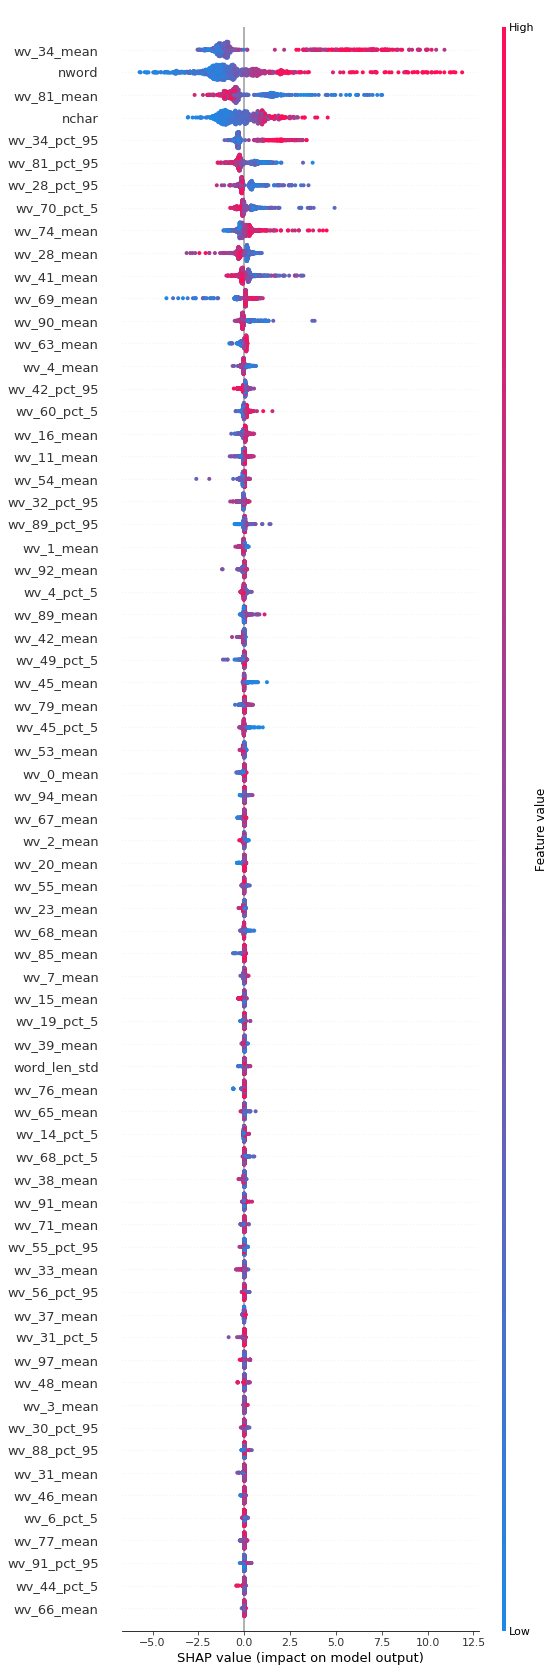

In [4]:
shap.summary_plot(shap_values, X, max_display = 70)